Data Visualization from Extraction Transformation and Loading (ETL) Process.

C:\Users\siddh\AppData\Local\Temp\ipykernel_5676\3404955834.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Age'] = df1['Age'].fillna(method = 'bfill')


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1 -0.537116      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.558168      1   
2                               Heikkinen, Miss. Laina    0 -0.263295      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.352802      1   
4                             Allen, Mr. William Henry    1  0.352802      0   
..                                                 ...  ...    

<Axes: xlabel='Fare', ylabel='Count'>

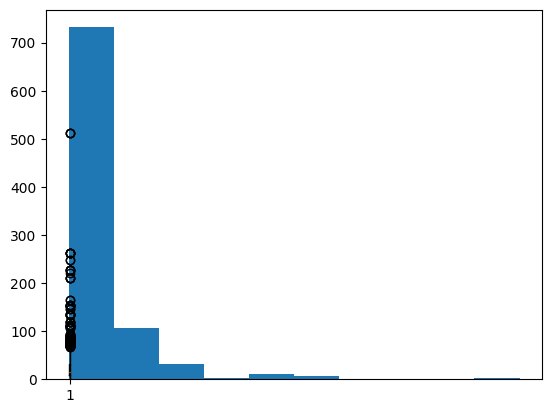

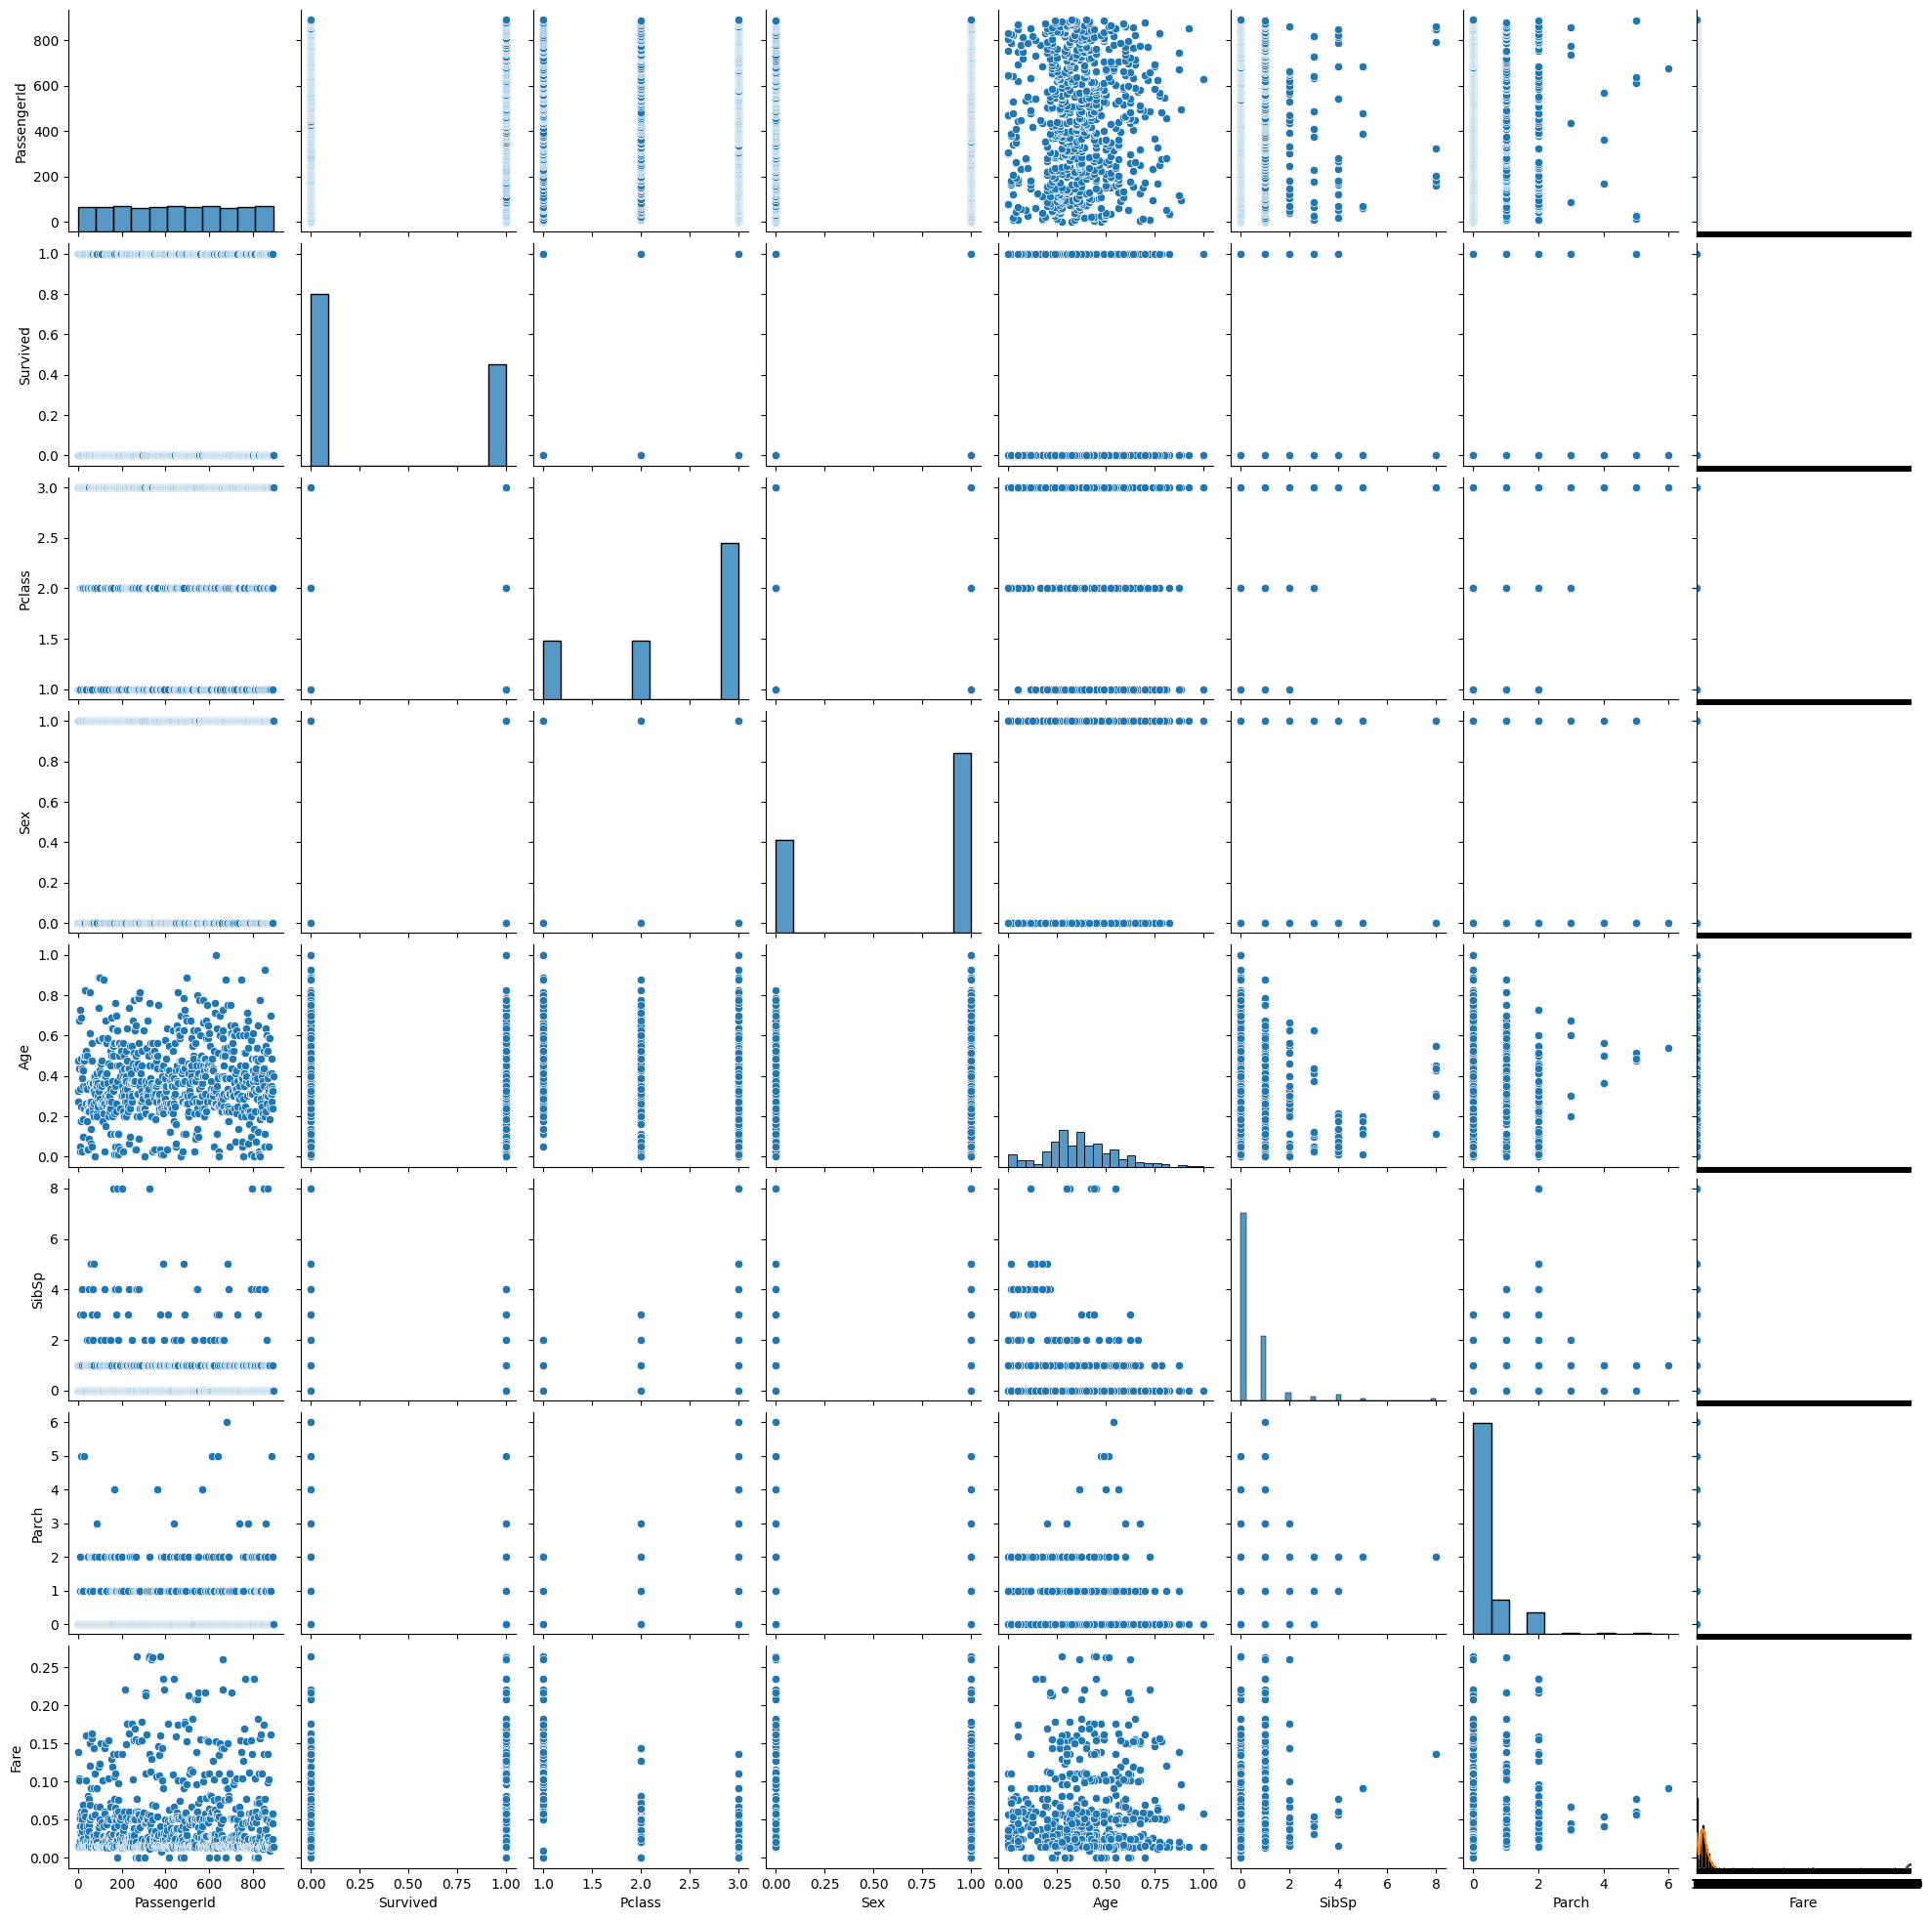

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic_dataset.csv')
df
df.isnull().sum()
df.notnull()
df = df.fillna(0, inplace = False)
df.isnull().sum()
df1 = pd.read_csv('titanic_dataset.csv')
df1.head()
df1['Sex']
df1['Sex'] = df1['Sex'].map({'male':1,'female':0})
df1['Sex']
df1.head()
df1.isnull().sum()
df1.dtypes
df1['Age'] = df1['Age'].fillna(method = 'bfill')
df1.head()
df1.isnull().sum()
df1['Age'] = df1['Age'].astype(int)
df1['Age'].dtypes
df1.dtypes
from sklearn.preprocessing import StandardScaler
target = ['Age','Fare']
sc = StandardScaler()
df1[target] = sc.fit_transform(df1[target])
target
print(df1)
df1.head()
from sklearn.preprocessing import MinMaxScaler
target = ['Age','Fare']
sc = MinMaxScaler()
df1[target] = sc.fit_transform(df1[target])
df1
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['Fare'])
plt.boxplot(df['Fare'])
Q1 = df1['Fare'].quantile(0.25)
Q3 = df1['Fare'].quantile(0.75)
IQR = Q3 - Q1
width = 5
lower = Q1 - (width * IQR)
upper = Q3 + (width * IQR)

# Remove outliers
df1 = df1[(df1['Fare'] >= lower) & (df1['Fare'] <= upper)]

# Now the 'Fare' column contains data without outliers
print(df1.head())
df1.to_excel('titanic_cleaned.xlsx', index=False)
plt.hist(df1['Age'])
plt.hist(x = df1['Fare'], align = 'mid')
import seaborn as sns
sns.pairplot(df1)
sns.histplot(df['Age'], kde = True)
sns.barplot(df1['Age'])
sns.boxplot(df1['Fare'])

Perform the data classification algorithm using any Classification algorithm.

In [2]:
#classification

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
X, y = load_iris(return_X_y=True)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)
# Initialize and train the logistic regression model
logreg = LogisticRegression().fit(X_train_scaled, y_train)
# Model evaluation
train_accuracy, test_accuracy = accuracy_score(y_train, logreg.predict(X_train_scaled)), accuracy_score(y_test, logreg.predict(X_test_scaled))
print("Training Accuracy:", train_accuracy, "\nTesting Accuracy:", test_accuracy)
# Additional evaluation metrics
print("Classification Report on Test Data:\n", classification_report(y_test, logreg.predict(X_test_scaled)))

Training Accuracy: 0.9666666666666667 
Testing Accuracy: 1.0
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Perform the data clustering algorithm using any Clustering algorithm.

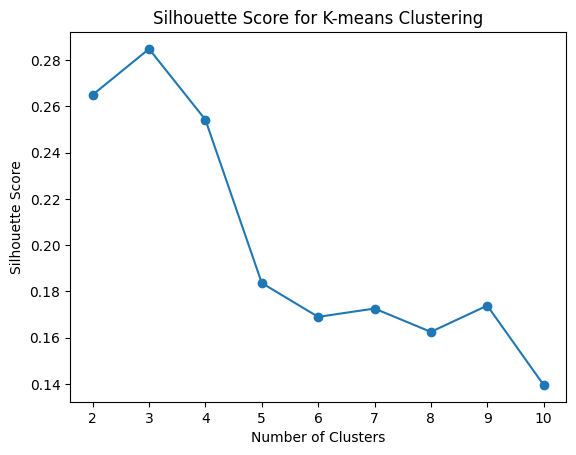

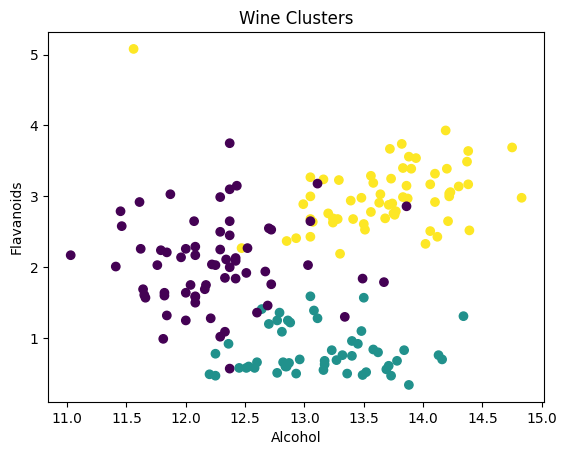

NameError: name 'ORRRR' is not defined

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the wine dataset
data = load_wine()

# Create a DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores to find optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.show()

# Based on the silhouette scores, let's choose 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters
plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Wine Clusters')
plt.show()

ORRRR

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
# Features
X = iris.data 
# Initialize KMeans with the number of clusters (3 for the iris dataset)
kmeans = KMeans(n_clusters=3)
# Fit KMeans to the data
kmeans.fit(X)
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
# Visualizing the clusters (assuming 2D data for simplicity)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Develop a MapReduce program to calculate the frequency of a given word in a given
file.

In [5]:
import sys

def mapper():
    for line in sys.stdin:
        name_scores = line.strip().split(", ")  # Split the line using comma as the delimiter
        name = name_scores[0]
        scores = list(map(int, name_scores[1].split()))  # Split scores using spaces as the delimiter
        average_score = sum(scores) / len(scores)
        grade = assign_grade(average_score)
        print(f"{name}\t{grade}")

def assign_grade(average_score):
    if average_score >= 90:
        return "A"
    elif average_score >= 80:
        return "B"
    elif average_score >= 70:
        return "C"
    elif average_score >= 60:
        return "D"
    else:
        return "F"

if __name__ == "__main__":
    mapper()
    
#REDUCER

import sys

def reducer():
    grade_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'F': 0}

    for line in sys.stdin:
        name, grade = line.strip().split("\t")
        grade_counts[grade] += 1

    for grade, count in grade_counts.items():
        print(f"Grade {grade}: {count} students")
        
if __name__ =="__main__":
    reducer()

Grade A: 0 students
Grade B: 0 students
Grade C: 0 students
Grade D: 0 students
Grade F: 0 students


Implement Matrix Multiplication using Map-Reduce.

In [7]:
import sys

with open(sys.argv[1],'r') as f:
	matrix_A = [list(map(int, line.strip().split())) for line in f]
    
with open(sys.argv[2],'r') as f:
	matrix_B = [list(map(int, line.strip().split())) for line in f]
for i in range(len(matrix_A)):
	for j in range(len(matrix_B[0])):
		for k in range(len(matrix_B)):
			print(f"{i}, {j}\t {matrix_A[i][k]}, {matrix_B[k][j]}")
            
#Reducer
import sys

current_key = None
current_values = []

for line in sys.stdin:
	key, value = line.strip().split('\t')


	if current_key == None:
		current_key = key
	if key != current_key:
		result = 0
		for value_pair in current_values:
			value1, value2 = value_pair.split(',')
			result += int(value1)*int(value2)
		print(f"{current_key}\t{result}")
		
		current_key = key
		current_values = []
		
	current_values.append(value)
	
result = 0

for value_pair in current_values:
	value1, value2 = value_pair.split(',')
	result += int(value1) * int(value2)
print(f"{current_key}\t{result}")

FileNotFoundError: [Errno 2] No such file or directory: '-f'

NEW Implement Matrix Multiplication using Map-Reduce.

In [8]:
import sys

with open(sys.argv[1],'r') as f:
	matrix_A = [list(map(int, line.strip().split())) for line in f]
    
with open(sys.argv[2],'r') as f:
	matrix_B = [list(map(int, line.strip().split())) for line in f]
for i in range(len(matrix_A)):
	for j in range(len(matrix_B[0])):
		for k in range(len(matrix_B)):
			print(f"{i}, {j}\t {matrix_A[i][k]}, {matrix_B[k][j]}")
#REDUCER
import sys

current_key = None
current_values = []

for line in sys.stdin:
	key, value = line.strip().split('\t')


	if current_key == None:
		current_key = key
	if key != current_key:
		result = 0
		for value_pair in current_values:
			value1, value2 = value_pair.split(',')
			result += int(value1)*int(value2)
		print(f"{current_key}\t{result}")
		
		current_key = key
		current_values = []
		
	current_values.append(value)
	
result = 0

for value_pair in current_values:
	value1, value2 = value_pair.split(',')
	result += int(value1) * int(value2)
print(f"{current_key}\t{result}")

FileNotFoundError: [Errno 2] No such file or directory: '-f'

Develop a MapReduce program to find the grades of students.

In [ ]:
import sys

def mapper():
    for line in sys.stdin:
        name_scores = line.strip().split(", ")  # Split the line using comma as the delimiter
        name = name_scores[0]
        scores = list(map(int, name_scores[1].split()))  # Split scores using spaces as the delimiter
        average_score = sum(scores) / len(scores)
        grade = assign_grade(average_score)
        print(f"{name}\t{grade}")

def assign_grade(average_score):
    if average_score >= 90:
        return "A"
    elif average_score >= 80:
        return "B"
    elif average_score >= 70:
        return "C"
    elif average_score >= 60:
        return "D"
    else:
        return "F"

if __name__ == "__main__":
    mapper()
    
Reducer
import sys

def reducer():
    grade_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'F': 0}

    for line in sys.stdin:
        name, grade = line.strip().split("\t")
        grade_counts[grade] += 1

    for grade, count in grade_counts.items():
        print(f"Grade {grade}: {count} students")
        
if __name__ =="__main__":
    reducer()

Mongo DB: Installation and Creation of database and Collection CRUD Document:
Insert, Query, Update and Delete Document.

In [ ]:
show db
use mydatabase
db.createCollection("mycollection")
db.mycollection.insertOne({ name: "John", age: 30 })
db.mycollection.insertMany([{name: "John", age:30},{name: "Sid", age:22}])
db.mycollection.find()
db.mycollection.updateOne({ name: "John" }, { $set: { age: 35 } })
db.mycollection.deleteOne({ name: "John" })
# db.mycollection.drop()
# db.dropDatabase()

WORD COUNT

In [ ]:
import sys

for line in sys.stdin:
    linechars = [c for c in line.lower() if c.isalpha() or c == '']
    words = ''.join(linechars).strip().split()
    
    for word in words:
        print('%s\t%s'% (word ,1))

#REDUCER
#!/usr/bin/env python

from operator import itemgetter
import sys

current_word = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()

    # parse the input we got from mapper.py
    word, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # write result to STDOUT
            print ('%s\t%s' % (current_word, current_count))
        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print ('%s\t%s' % (current_word, current_count))